In [1]:
import sys
import os
import importlib

# Ajout du chemin une fois
sys.path.append(os.path.abspath('../../../python_files'))

# Liste des noms des modules à importer et recharger
module_names = [
    'preprocessing',
    'imports',
    'files',
    'clustering',
    'profile_prediction',
    'prediction_24h'
]

# Import et reload automatique
modules = {}
for name in module_names:
    modules[name] = importlib.import_module(name)
    importlib.reload(modules[name])

# Importer tout en global namespace (équivalent à from ... import *)
for name in module_names:
    exec(f'from {name} import *')


In [2]:
Simulation_Dataset = {
    "2018": "../../../data/simulated_data_7years/Mal_isole/2018/Simulation_Outputs",
    "2019": "../../../data/simulated_data_7years/Mal_isole/2019/Simulation_Outputs",
    "2020": "../../../data/simulated_data_7years/Mal_isole/2020/Simulation_Outputs",
    "2021": "../../../data/simulated_data_7years/Mal_isole/2021/Simulation_Outputs",
    "2022": "../../../data/simulated_data_7years/Mal_isole/2022/Simulation_Outputs",
    "2023": "../../../data/simulated_data_7years/Mal_isole/2023/Simulation_Outputs",
    "2024": "../../../data/simulated_data_7years/Mal_isole/2024/Simulation_Outputs"   
}

Weather_Dataset = {
    "2018": "../../../data/simulated_data_7years/Mal_isole/2018/Weather_Dataset.txt",
    "2019": "../../../data/simulated_data_7years/Mal_isole/2019/Weather_Dataset.txt",
    "2020": "../../../data/simulated_data_7years/Mal_isole/2020/Weather_Dataset.txt",
    "2021": "../../../data/simulated_data_7years/Mal_isole/2021/Weather_Dataset.txt",
    "2022": "../../../data/simulated_data_7years/Mal_isole/2022/Weather_Dataset.txt",
    "2023": "../../../data/simulated_data_7years/Mal_isole/2023/Weather_Dataset.txt",
    "2024": "../../../data/simulated_data_7years/Mal_isole/2024/Weather_Dataset.txt"   
}


In [31]:
consommation_chauffage = extract_and_concat_consommation(Simulation_Dataset, column_index=4, prefix="consommation_heat_")

# Exemple d'utilisation
city_groups = {
    "Weather_Dataset": Weather_Dataset
   
    
}

prefix_column_map = {
    "Text_": 1,
    "Hum_": 3,
    "ray_": 7,
    
}

combined_data = extract_and_combine_all(city_groups, prefix_column_map)
Text_combined = combined_data.get('Text_combined_Weather_Dataset')
Hum_combined = combined_data.get('Hum_combined_Weather_Dataset')
ray_combined = combined_data.get('ray_combined_Weather_Dataset')
occupation=pd.read_csv("../../../data/simulated_data_7years/Mal_isole/Occup_Schedule_Youssef.txt")
occ_df = pd.DataFrame(occupation["Occupancy"].values[:8760].reshape(-1, 24))
occupation_7years = pd.concat([occ_df] * 7, ignore_index=True)


In [37]:
clustering_heat_7years=pd.read_csv("../../../data/simulated_data_7years/result_data/rapport.csv")

In [38]:
clustering_heat_7years

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,heat_on,clusters_1,clusters_2,clusters_3,clusters_4,Date
0,0.000000,1190.005593,1312.271393,1424.724691,1527.396881,1603.485177,1671.400352,1740.431185,1790.605077,1216.560286,...,508.643111,651.904957,778.040225,888.554598,1,1.0,1.0,0.0,1.0,2018-01-01
1,1005.550681,1127.766292,1233.641357,1321.408494,1399.670350,1458.886127,1515.122264,2979.323792,3739.414021,4207.830294,...,778.108310,824.081084,868.599998,893.925703,1,1.0,2.0,2.0,0.0,2018-01-02
2,924.436733,958.702252,968.290817,932.483420,874.717413,830.205371,817.575266,1055.464998,1289.844568,1546.259325,...,0.000000,0.000000,0.000000,0.000000,1,0.0,1.0,0.0,1.0,2018-01-03
3,19.168216,0.000000,18.951647,63.175139,123.523419,159.426268,209.111482,399.231083,621.905997,493.535690,...,0.000000,0.000000,0.000000,0.000000,1,0.0,1.0,0.0,1.0,2018-01-04
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,470.180799,1701.089422,1853.567138,...,0.000000,0.000000,0.000000,0.000000,1,0.0,1.0,0.0,1.0,2018-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262,1855.269545,1922.169284,1996.762839,2059.920494,2129.075626,2176.737754,2235.827382,4726.921360,6845.611394,8132.399160,...,81.345382,0.000000,212.121982,246.909885,1,1.0,0.0,2.0,1.0,2024-12-25
1263,533.512275,800.023366,1054.457623,1315.364083,1576.297106,1776.415143,1964.386398,5150.941418,8910.060497,10280.940889,...,0.000000,0.000000,0.000000,0.000000,1,1.0,0.0,2.0,1.0,2024-12-26
1264,135.701989,240.006813,564.344612,866.066752,1143.123950,1402.092014,1630.131841,1863.032539,2064.147063,2181.354689,...,0.000000,0.000000,0.000000,0.000000,1,0.0,1.0,0.0,1.0,2024-12-27
1265,18.324647,257.623584,617.783817,877.351319,1055.206810,1254.176751,1458.629733,1627.782623,1783.372965,1908.663385,...,1523.293569,1692.012333,1848.803664,1984.524873,1,0.0,1.0,0.0,0.0,2024-12-28


In [ ]:
start_date = "2018-01-01"
dates = pd.date_range(start=start_date, periods=len(consommation_chauffage), freq="D") 
Text_combined.insert(0, "Date", dates)
Hum_combined.insert(0, "Date", dates)
ray_combined.insert(0, "Date", dates)
occupation_7years.insert(0, "Date", dates)

add_heating_season(Text_combined)
add_heating_season(Hum_combined)
add_heating_season(ray_combined)
add_heating_season(occupation_7years)


df_Text = Text_combined[Text_combined["heat"] == 1].drop(columns=["heat"]).copy().reset_index(drop=True)
df_Hum = Hum_combined[Hum_combined["heat"] == 1].drop(columns=["heat"]).copy().reset_index(drop=True)
df_occ = occupation_7years[occupation_7years["heat"] == 1].drop(columns=["heat"]).copy().reset_index(drop=True)
df_ray = ray_combined[ray_combined["heat"] == 1].drop(columns=["heat"]).copy().reset_index(drop=True)

In [33]:
df_occ=df_occ.drop(columns=["Date"])
df_Hum=df_Hum.drop(columns=["Date"])
df_ray=df_ray.drop(columns=["Date"])
df_combined = pd.concat([df_Text,df_Hum, df_occ,df_ray], axis=1)

In [36]:
clustering_heat_7years

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,heat_on,clusters_1,clusters_2,clusters_3,clusters_4
0,0.000000,1190.005593,1312.271393,1424.724691,1527.396881,1603.485177,1671.400352,1740.431185,1790.605077,1216.560286,...,366.664243,508.643111,651.904957,778.040225,888.554598,1,1.0,1.0,0.0,1.0
1,1005.550681,1127.766292,1233.641357,1321.408494,1399.670350,1458.886127,1515.122264,2979.323792,3739.414021,4207.830294,...,750.194288,778.108310,824.081084,868.599998,893.925703,1,1.0,2.0,2.0,0.0
2,924.436733,958.702252,968.290817,932.483420,874.717413,830.205371,817.575266,1055.464998,1289.844568,1546.259325,...,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.0,1.0,0.0,1.0
3,19.168216,0.000000,18.951647,63.175139,123.523419,159.426268,209.111482,399.231083,621.905997,493.535690,...,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.0,1.0,0.0,1.0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,470.180799,1701.089422,1853.567138,...,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262,1855.269545,1922.169284,1996.762839,2059.920494,2129.075626,2176.737754,2235.827382,4726.921360,6845.611394,8132.399160,...,0.000000,81.345382,0.000000,212.121982,246.909885,1,1.0,0.0,2.0,1.0
1263,533.512275,800.023366,1054.457623,1315.364083,1576.297106,1776.415143,1964.386398,5150.941418,8910.060497,10280.940889,...,0.000000,0.000000,0.000000,0.000000,0.000000,1,1.0,0.0,2.0,1.0
1264,135.701989,240.006813,564.344612,866.066752,1143.123950,1402.092014,1630.131841,1863.032539,2064.147063,2181.354689,...,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.0,1.0,0.0,1.0
1265,18.324647,257.623584,617.783817,877.351319,1055.206810,1254.176751,1458.629733,1627.782623,1783.372965,1908.663385,...,1320.078226,1523.293569,1692.012333,1848.803664,1984.524873,1,0.0,1.0,0.0,0.0


In [40]:
df_combined['Date'] = pd.to_datetime(df_combined['Date'])
clustering_heat_7years['Date'] = pd.to_datetime(clustering_heat_7years['Date'])
df_combined = df_combined.merge(
    clustering_heat_7years[[ 'Date','heat_on', 'clusters_1', 'clusters_2', 'clusters_3', 'clusters_4']],
    on='Date',
    how='inner'  
)


In [41]:
from sklearn.metrics import (
    f1_score, accuracy_score, confusion_matrix,
    zero_one_loss, hamming_loss,
    precision_score, recall_score
)
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.pyplot as plt
import seaborn as sns
import time

def evaluate_models_split(df, target_cols, models, split_ratio=8):
    """
    Évalue plusieurs modèles (mono-label ou multi-label) avec séparation manuelle (80% par défaut).
    Si `target_cols` contient plusieurs colonnes => multi-label.
    Retourne :
      - un dictionnaire avec les métriques,
      - un DataFrame avec les vraies valeurs et prédictions.
    """
    multi_label = isinstance(target_cols, list) and len(target_cols) > 1
    y = df[target_cols] if multi_label else df[[target_cols]]
    X = df.drop(columns=target_cols if multi_label else [target_cols])  
    
    split_index = int((X.shape[0] * split_ratio) / 10)
    X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
    y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

    results = {}
    df_test_results = X_test.copy()
    for col in (target_cols if multi_label else [target_cols]):
        df_test_results[f'y_true_{col}'] = y_test[col].values

    if multi_label:
        mlb = MultiLabelBinarizer()
        y_train_bin = mlb.fit_transform(y_train.values.tolist())
        y_test_bin = mlb.transform(y_test.values.tolist())

    for name, model in models.items():
        print(f"\nÉvaluation de {name}...")
        start_time = time.time()
        if multi_label:
            model.fit(X_train, y_train_bin)
            y_pred_bin = model.predict(X_test)
        else:
            model.fit(X_train, y_train.values.ravel())
            y_pred = model.predict(X_test)
        exec_time = time.time() - start_time

        if multi_label:
            f1 = f1_score(y_test_bin, y_pred_bin, average='weighted')
            acc = accuracy_score(y_test_bin, y_pred_bin)
            prec = precision_score(y_test_bin, y_pred_bin, average='weighted', zero_division=0)
            recall = recall_score(y_test_bin, y_pred_bin, average='weighted', zero_division=0)
            zero_one = zero_one_loss(y_test_bin, y_pred_bin)
            hamming = hamming_loss(y_test_bin, y_pred_bin)

            results[name] = {
                "f1_score": f1,
                "precision": prec,
                "recall": recall,
                "accuracy": acc,
                "zero_one_loss": zero_one,
                "hamming_loss": hamming,
                "execution_time (s)": exec_time
            }

            for i, col in enumerate(target_cols):
                df_test_results[f'y_pred_{name}_{col}'] = y_pred_bin[:, i]

            print(f"{name} - F1: {f1:.4f} - Precision: {prec:.4f} - Recall: {recall:.4f} - "
                  f"Accuracy: {acc:.4f} - 0/1 Loss: {zero_one:.4f} - Hamming Loss: {hamming:.4f} - Temps: {exec_time:.2f}s")
        else:
            f1 = f1_score(y_test, y_pred, average='weighted')
            acc = accuracy_score(y_test, y_pred)
            prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
            recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
            cm = confusion_matrix(y_test, y_pred)

            results[name] = {
                "f1_score": f1,
                "precision": prec,
                "recall": recall,
                "accuracy": acc,
                "execution_time (s)": exec_time
            }

            df_test_results[f'y_pred_{name}_clusters_1'] = y_pred

            plt.figure(figsize=(5, 4))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                        xticklabels=model.classes_, yticklabels=model.classes_)
            plt.xlabel('Prédictions')
            plt.ylabel('Vraies classes')
            plt.title(f'Matrice de confusion - {name}')
            plt.show()

            print(f"{name} - F1: {f1:.4f} - Precision: {prec:.4f} - Recall: {recall:.4f} - "
                  f"Accuracy: {acc:.4f} - Temps: {exec_time:.2f}s")
        print("###################################################################")

    return results, df_test_results


In [44]:
df_combined

,Date,0,1,2,3,4,5,6,7,8,...,19,20,21,22,23,heat_on,clusters_1,clusters_2,clusters_3,clusters_4
0,2018-01-01,9.060,8.930,8.500,8.140,7.985,7.810,7.800,7.810,7.950,...,0.0,0.0,0.0,0.0,0.0,1,1.0,1.0,0.0,1.0
1,2018-01-02,9.500,9.200,8.975,8.840,8.770,8.620,8.660,8.930,9.170,...,0.0,0.0,0.0,0.0,0.0,1,1.0,2.0,2.0,0.0
2,2018-01-03,13.715,13.685,13.870,14.490,15.240,15.570,15.760,15.765,15.485,...,0.0,0.0,0.0,0.0,0.0,1,0.0,1.0,0.0,1.0
3,2018-01-04,13.885,14.855,15.375,15.390,15.465,15.500,15.530,15.540,15.495,...,0.0,0.0,0.0,0.0,0.0,1,0.0,1.0,0.0,1.0
4,2018-01-05,12.245,12.035,11.640,11.025,10.375,9.815,9.370,9.015,8.880,...,0.0,0.0,0.0,0.0,0.0,1,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262,2024-12-25,6.590,6.480,6.280,6.235,6.215,6.090,5.925,5.740,5.530,...,0.0,0.0,0.0,0.0,0.0,1,1.0,0.0,2.0,1.0
1263,2024-12-26,3.025,2.570,2.105,1.640,1.165,0.835,0.600,0.355,0.255,...,0.0,0.0,0.0,0.0,0.0,1,1.0,0.0,2.0,1.0
1264,2024-12-27,1.180,0.855,0.530,0.130,-0.230,-0.565,-0.910,-1.245,-1.405,...,0.0,0.0,0.0,0.0,0.0,1,0.0,1.0,0.0,1.0
1265,2024-12-28,1.145,0.350,-0.360,-0.480,-0.235,-0.165,-0.150,-0.035,0.020,...,0.0,0.0,0.0,0.0,0.0,1,0.0,1.0,0.0,0.0


In [46]:
df_combined.columns = df_combined.columns.astype(str)

re, Test_Text_heat_toulouse = evaluate_models_split(
    df=df_combined.drop(columns=["Date"]),
    target_cols=["clusters_1","clusters_2","clusters_3","clusters_4"],
    models=models2,
    split_ratio=8
)



Évaluation de Random Forest...
Random Forest - F1: 0.9560 - Precision: 0.9613 - Recall: 0.9516 - Accuracy: 0.8031 - 0/1 Loss: 0.1969 - Hamming Loss: 0.0502 - Temps: 2.44s
###################################################################

Évaluation de Logistic Regression...


c:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Logistic Regression - F1: 0.8087 - Precision: 0.8381 - Recall: 0.7863 - Accuracy: 0.5433 - 0/1 Loss: 0.4567 - Hamming Loss: 0.2215 - Temps: 2.34s
###################################################################

Évaluation de SVC...
SVC - F1: 0.6963 - Precision: 0.6696 - Recall: 0.7529 - Accuracy: 0.3898 - 0/1 Loss: 0.6102 - Hamming Loss: 0.2864 - Temps: 0.41s
###################################################################

Évaluation de KNN...
KNN - F1: 0.7116 - Precision: 0.7010 - Recall: 0.7262 - Accuracy: 0.3780 - 0/1 Loss: 0.6220 - Hamming Loss: 0.3258 - Temps: 0.14s
###################################################################

Évaluation de Gradient Boosting...
Gradient Boosting - F1: 0.9674 - Precision: 0.9705 - Recall: 0.9649 - Accuracy: 0.8504 - 0/1 Loss: 0.1496 - Hamming Loss: 0.0374 - Temps: 7.57s
###################################################################


In [21]:
def evaluate_models_cv(df, target_cols, models, n_splits=5, random_state=42):
    """
    Évalue plusieurs modèles (mono-label ou multi-label) avec validation croisée.
    Si `target_cols` contient plusieurs colonnes => multi-label.
    Retourne :
      - un dictionnaire avec les métriques moyennes,
      - un DataFrame avec les vraies valeurs et prédictions concaténées sur tous les folds.
    """
    multi_label = isinstance(target_cols, list) and len(target_cols) > 1
    y = df[target_cols] if multi_label else df[[target_cols]]
    X = df.drop(columns=target_cols if multi_label else [target_cols])

    df_all_preds = pd.DataFrame()
    results = {name: {
        "f1_score": [], "precision": [], "recall": [],
        "accuracy": [], "execution_time (s)": [],
    } for name in models}

    if multi_label:
        mlb = MultiLabelBinarizer()
        y_bin = mlb.fit_transform(y.values.tolist())
        cv = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
        splits = list(cv.split(X))
    else:
        y_flat = y.values.ravel()
        cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
        splits = list(cv.split(X, y_flat))

    for fold, (train_idx, test_idx) in enumerate(splits):
        print(f"\n=== Fold {fold + 1}/{n_splits} ===")
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        if multi_label:
            y_train_bin = mlb.transform(y_train.values.tolist())
            y_test_bin = mlb.transform(y_test.values.tolist())

        for name, model in models.items():
            print(f"\nÉvaluation de {name} sur fold {fold + 1}...")
            start_time = time.time()

            if multi_label:
                model.fit(X_train, y_train_bin)
                y_pred_bin = model.predict(X_test)
            else:
                model.fit(X_train, y_train.values.ravel())
                y_pred = model.predict(X_test)

            exec_time = time.time() - start_time

            if multi_label:
                f1 = f1_score(y_test_bin, y_pred_bin, average='weighted', zero_division=0)
                acc = accuracy_score(y_test_bin, y_pred_bin)
                prec = precision_score(y_test_bin, y_pred_bin, average='weighted', zero_division=0)
                recall = recall_score(y_test_bin, y_pred_bin, average='weighted', zero_division=0)

                results[name]["f1_score"].append(f1)
                results[name]["precision"].append(prec)
                results[name]["recall"].append(recall)
                results[name]["accuracy"].append(acc)
                results[name]["execution_time (s)"].append(exec_time)

                fold_preds = X_test.copy()
                for i, col in enumerate(target_cols):
                    for suffix in [f'y_true_{col}', f'y_pred_{name}_{col}']:
                        if suffix in fold_preds.columns:
                            fold_preds.drop(columns=suffix, inplace=True)
                    fold_preds[f'y_true_{col}'] = y_test[col].values
                    fold_preds[f'y_pred_{name}_{col}'] = y_pred_bin[:, i]
                df_all_preds = pd.concat([df_all_preds, fold_preds.reset_index(drop=True)], ignore_index=True)

                print(f"{name} - F1: {f1:.4f} - Precision: {prec:.4f} - Recall: {recall:.4f} - "
                      f"Accuracy: {acc:.4f} - Temps: {exec_time:.2f}s")

            else:
                f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
                acc = accuracy_score(y_test, y_pred)
                prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
                recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
                cm = confusion_matrix(y_test, y_pred)

                results[name]["f1_score"].append(f1)
                results[name]["precision"].append(prec)
                results[name]["recall"].append(recall)
                results[name]["accuracy"].append(acc)
                results[name]["execution_time (s)"].append(exec_time)

                fold_preds = X_test.copy()
                col = target_cols if isinstance(target_cols, str) else target_cols[0]
                for suffix in [f'y_true_{col}', f'y_pred_{name}_{col}']:
                    if suffix in fold_preds.columns:
                        fold_preds.drop(columns=suffix, inplace=True)
                fold_preds[f'y_true_{col}'] = y_test.values
                fold_preds[f'y_pred_{name}_{col}'] = y_pred
                df_all_preds = pd.concat([df_all_preds, fold_preds.reset_index(drop=True)], ignore_index=True)

                plt.figure(figsize=(5, 4))
                sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                            xticklabels=model.classes_, yticklabels=model.classes_)
                plt.xlabel('Prédictions')
                plt.ylabel('Vraies classes')
                plt.title(f'Matrice de confusion - {name} - Fold {fold+1}')
                plt.show()

                print(f"{name} - F1: {f1:.4f} - Precision: {prec:.4f} - Recall: {recall:.4f} - "
                      f"Accuracy: {acc:.4f} - Temps: {exec_time:.2f}s")
        print("###################################################################")

    # Moyenne des résultats
    avg_results = {
        name: {metric: np.mean(scores) for metric, scores in metrics.items()}
        for name, metrics in results.items()
    }

    return avg_results, df_all_preds


In [23]:
def evaluate_models_cv(df, target_cols, models, n_splits=5, random_state=42):
    from sklearn.model_selection import StratifiedKFold, KFold
    from sklearn.metrics import (
        f1_score, accuracy_score, precision_score, recall_score, confusion_matrix
    )
    from sklearn.preprocessing import MultiLabelBinarizer
    import time
    import numpy as np
    import seaborn as sns
    import matplotlib.pyplot as plt

    multi_label = isinstance(target_cols, list) and len(target_cols) > 1
    y = df[target_cols] if multi_label else df[[target_cols]]
    X = df.drop(columns=target_cols if multi_label else [target_cols])

    results = {name: {
        "f1_score": [], "precision": [], "recall": [],
        "accuracy": [], "execution_time (s)": []
    } for name in models}

    if multi_label:
        mlb = MultiLabelBinarizer()
        y_bin = mlb.fit_transform(y.values.tolist())
        cv = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
        splits = list(cv.split(X))
    else:
        y_flat = y.values.ravel()
        cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
        splits = list(cv.split(X, y_flat))

    for fold, (train_idx, test_idx) in enumerate(splits):
        print(f"\n=== Fold {fold + 1}/{n_splits} ===")
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        if multi_label:
            y_train_bin = mlb.transform(y_train.values.tolist())
            y_test_bin = mlb.transform(y_test.values.tolist())

        for name, model in models.items():
            print(f"\nÉvaluation de {name} sur fold {fold + 1}...")
            start_time = time.time()

            if multi_label:
                model.fit(X_train, y_train_bin)
                y_pred_bin = model.predict(X_test)
            else:
                model.fit(X_train, y_train.values.ravel())
                y_pred = model.predict(X_test)

            exec_time = time.time() - start_time

            if multi_label:
                f1 = f1_score(y_test_bin, y_pred_bin, average='weighted')
                acc = accuracy_score(y_test_bin, y_pred_bin)
                prec = precision_score(y_test_bin, y_pred_bin, average='weighted', zero_division=0)
                recall = recall_score(y_test_bin, y_pred_bin, average='weighted', zero_division=0)
            else:
                f1 = f1_score(y_test, y_pred, average='weighted')
                acc = accuracy_score(y_test, y_pred)
                prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
                recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
                cm = confusion_matrix(y_test, y_pred)

                plt.figure(figsize=(5, 4))
                sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                            xticklabels=model.classes_, yticklabels=model.classes_)
                plt.xlabel('Prédictions')
                plt.ylabel('Vraies classes')
                plt.title(f'Matrice de confusion - {name} - Fold {fold+1}')
                plt.show()

            results[name]["f1_score"].append(f1)
            results[name]["precision"].append(prec)
            results[name]["recall"].append(recall)
            results[name]["accuracy"].append(acc)
            results[name]["execution_time (s)"].append(exec_time)

            print(f"{name} - F1: {f1:.4f} - Precision: {prec:.4f} - Recall: {recall:.4f} - "
                  f"Accuracy: {acc:.4f} - Temps: {exec_time:.2f}s")
        print("###################################################################")

    avg_results = {
        name: {metric: np.mean(scores) for metric, scores in metrics.items()}
        for name, metrics in results.items()
    }

    return avg_results



=== Fold 1/4 ===

Évaluation de Random Forest sur fold 1...


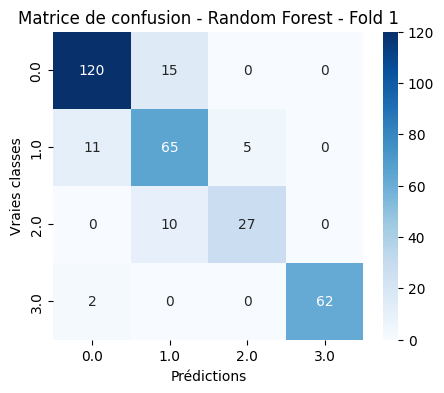

Random Forest - F1: 0.8657 - Precision: 0.8692 - Recall: 0.8644 - Accuracy: 0.8644 - Temps: 0.77s

Évaluation de Logistic Regression sur fold 1...


c:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


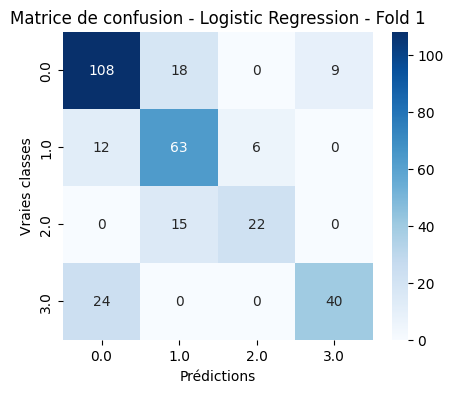

Logistic Regression - F1: 0.7335 - Precision: 0.7436 - Recall: 0.7350 - Accuracy: 0.7350 - Temps: 0.95s

Évaluation de SVC sur fold 1...


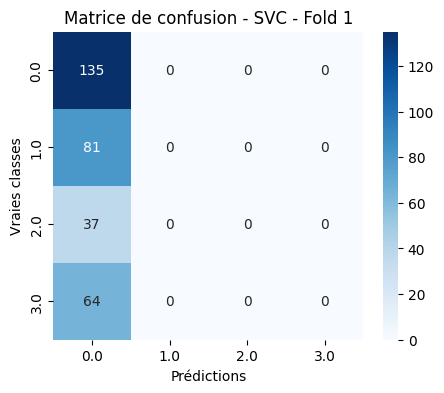

SVC - F1: 0.2544 - Precision: 0.1814 - Recall: 0.4259 - Accuracy: 0.4259 - Temps: 0.15s

Évaluation de KNN sur fold 1...


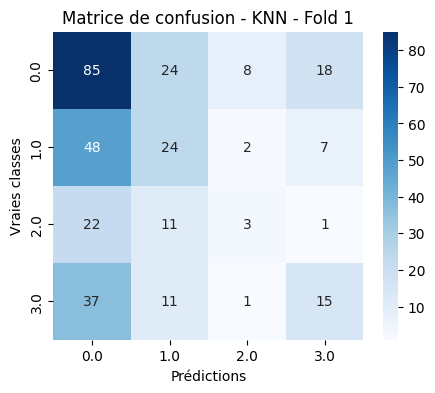

KNN - F1: 0.3740 - Precision: 0.3750 - Recall: 0.4006 - Accuracy: 0.4006 - Temps: 0.05s

Évaluation de Gradient Boosting sur fold 1...


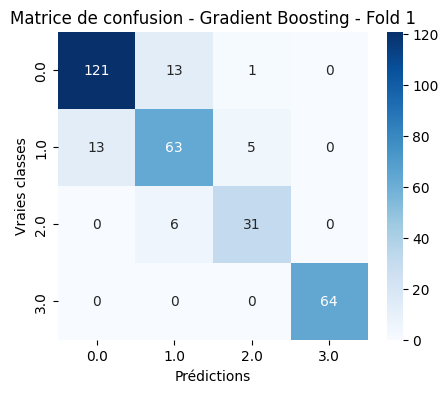

Gradient Boosting - F1: 0.8803 - Precision: 0.8806 - Recall: 0.8801 - Accuracy: 0.8801 - Temps: 8.44s
###################################################################

=== Fold 2/4 ===

Évaluation de Random Forest sur fold 2...


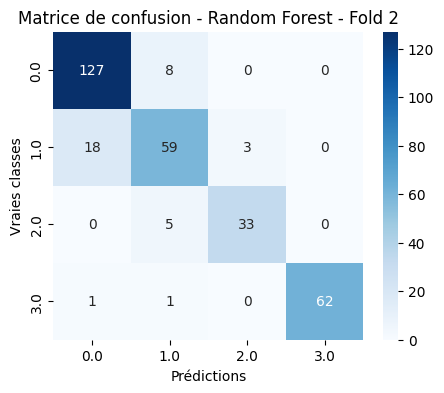

Random Forest - F1: 0.8852 - Precision: 0.8862 - Recall: 0.8864 - Accuracy: 0.8864 - Temps: 0.53s

Évaluation de Logistic Regression sur fold 2...


c:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


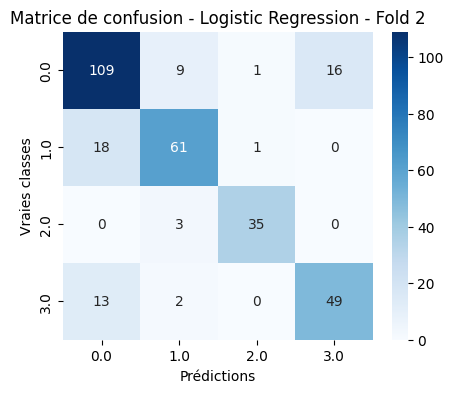

Logistic Regression - F1: 0.8015 - Precision: 0.8024 - Recall: 0.8013 - Accuracy: 0.8013 - Temps: 0.90s

Évaluation de SVC sur fold 2...


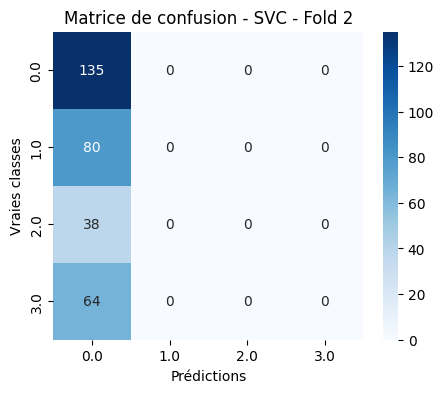

SVC - F1: 0.2544 - Precision: 0.1814 - Recall: 0.4259 - Accuracy: 0.4259 - Temps: 0.13s

Évaluation de KNN sur fold 2...


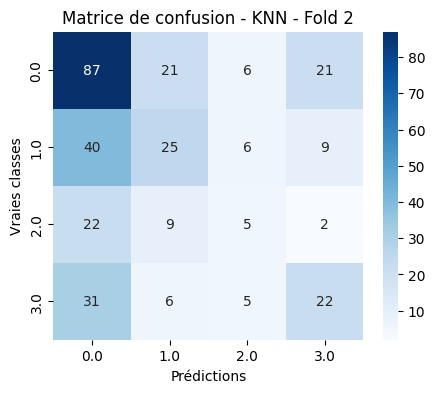

KNN - F1: 0.4200 - Precision: 0.4188 - Recall: 0.4385 - Accuracy: 0.4385 - Temps: 0.04s

Évaluation de Gradient Boosting sur fold 2...


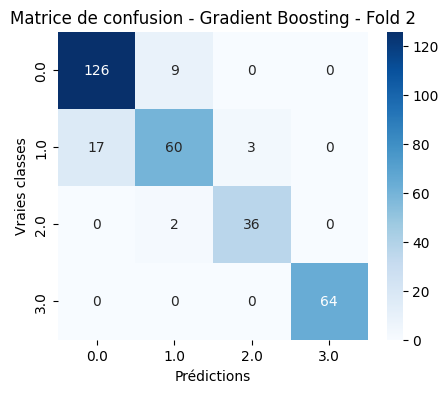

Gradient Boosting - F1: 0.9006 - Precision: 0.9011 - Recall: 0.9022 - Accuracy: 0.9022 - Temps: 8.32s
###################################################################

=== Fold 3/4 ===

Évaluation de Random Forest sur fold 3...


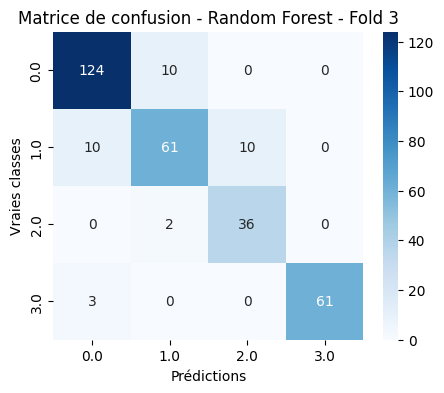

Random Forest - F1: 0.8891 - Precision: 0.8918 - Recall: 0.8896 - Accuracy: 0.8896 - Temps: 0.55s

Évaluation de Logistic Regression sur fold 3...


c:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


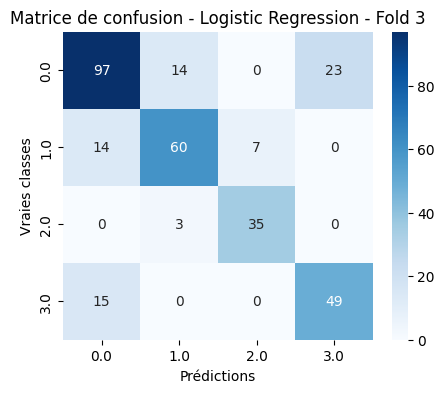

Logistic Regression - F1: 0.7598 - Precision: 0.7618 - Recall: 0.7603 - Accuracy: 0.7603 - Temps: 0.89s

Évaluation de SVC sur fold 3...


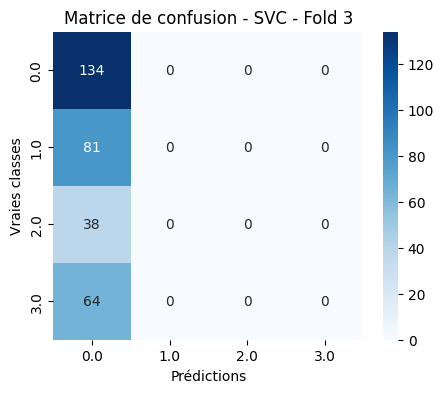

SVC - F1: 0.2512 - Precision: 0.1787 - Recall: 0.4227 - Accuracy: 0.4227 - Temps: 0.13s

Évaluation de KNN sur fold 3...


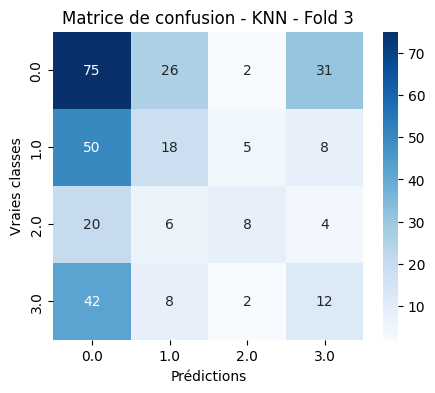

KNN - F1: 0.3393 - Precision: 0.3493 - Recall: 0.3565 - Accuracy: 0.3565 - Temps: 0.03s

Évaluation de Gradient Boosting sur fold 3...


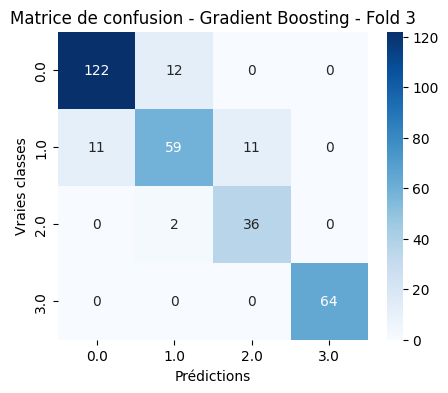

Gradient Boosting - F1: 0.8855 - Precision: 0.8880 - Recall: 0.8864 - Accuracy: 0.8864 - Temps: 8.41s
###################################################################

=== Fold 4/4 ===

Évaluation de Random Forest sur fold 4...


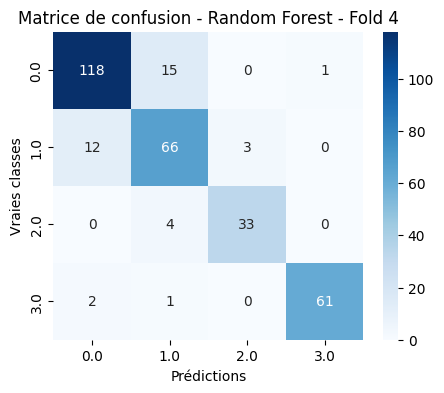

Random Forest - F1: 0.8808 - Precision: 0.8824 - Recall: 0.8797 - Accuracy: 0.8797 - Temps: 0.62s

Évaluation de Logistic Regression sur fold 4...


c:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


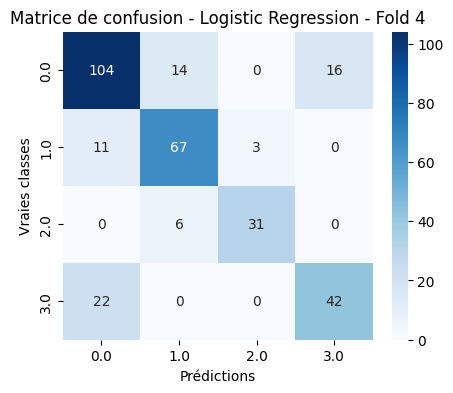

Logistic Regression - F1: 0.7716 - Precision: 0.7727 - Recall: 0.7722 - Accuracy: 0.7722 - Temps: 0.92s

Évaluation de SVC sur fold 4...


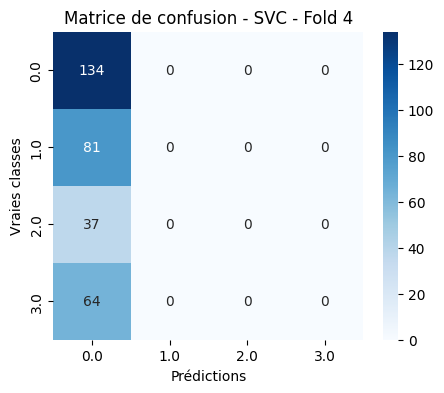

SVC - F1: 0.2525 - Precision: 0.1798 - Recall: 0.4241 - Accuracy: 0.4241 - Temps: 0.14s

Évaluation de KNN sur fold 4...


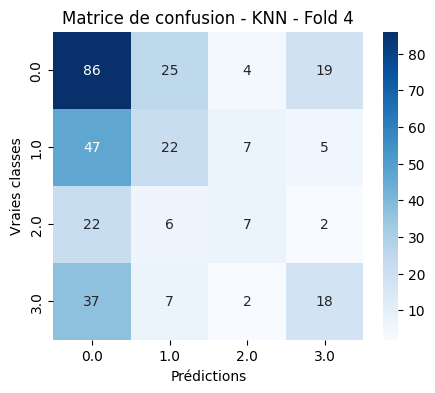

KNN - F1: 0.4000 - Precision: 0.4078 - Recall: 0.4209 - Accuracy: 0.4209 - Temps: 0.06s

Évaluation de Gradient Boosting sur fold 4...


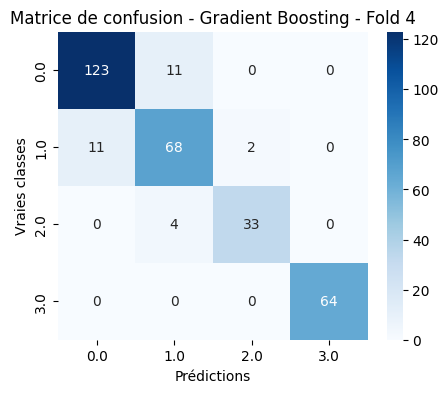

Gradient Boosting - F1: 0.9117 - Precision: 0.9122 - Recall: 0.9114 - Accuracy: 0.9114 - Temps: 8.76s
###################################################################


In [25]:
df_combined.columns = df_combined.columns.astype(str)

re = evaluate_models_cv(
    df=df_combined.drop(columns=["Date","cluster_reel"]),
    target_cols="clusters_1",
    models=models,
    n_splits=4
)

In [26]:
re

{'Random Forest': {'f1_score': 0.8801757052430671,
  'precision': 0.8823910384520669,
  'recall': 0.8800313460847342,
  'accuracy': 0.8800313460847342,
  'execution_time (s)': 0.618669331073761},
 'Logistic Regression': {'f1_score': 0.7666245519266452,
  'precision': 0.770142830573787,
  'recall': 0.767170466797109,
  'accuracy': 0.767170466797109,
  'execution_time (s)': 0.9161249995231628},
 'SVC': {'f1_score': 0.253129077643677,
  'precision': 0.18030785804555605,
  'recall': 0.4246246456095516,
  'accuracy': 0.4246246456095516,
  'execution_time (s)': 0.13880932331085205},
 'KNN': {'f1_score': 0.3833303018565656,
  'precision': 0.3877091727291617,
  'recall': 0.40411741804096957,
  'accuracy': 0.40411741804096957,
  'execution_time (s)': 0.044162631034851074},
 'Gradient Boosting': {'f1_score': 0.8945230321809012,
  'precision': 0.8954393237263244,
  'recall': 0.8950405302879049,
  'accuracy': 0.8950405302879049,
  'execution_time (s)': 8.482807099819183}}

## Remplacement des profils réels par les profils prédits

Pour la partie test (les 20% dernières données), nous remplaçons les profils de consommation réels par les profils prédits générés par le meilleur modèle de régression logistique (`y_pred_Logistic Regression_clusters_1`). 


Cela simule un scénario réaliste où seules les données historiques jusqu'à la partie test sont observées, et où les prédictions de 24 heures sont réalisées sur des profils non observés, basées sur les résultats du modèle.


In [34]:
n = len(df_combined)
cutoff = int(n * 0.8)  # 80% des données

# Vérifier la taille
assert len(Test_Text_heat_toulouse) == n - cutoff, "Les tailles ne correspondent pas !"

new_cluster_1 = df_combined['clusters_1'].copy()

# Remplacer les 20% derniers par la colonne y_pred_... de Test_Text_heat_toulouse (qui est déjà les 20%)
new_cluster_1.iloc[cutoff:] = Test_Text_heat_toulouse['y_pred_Logistic Regression_clusters_1'].values

df_combined['clusters_1'] = new_cluster_1


In [35]:
df_combined.to_csv("../../../data/simulated_data_7years/result_data/profile_prediction_valeurexact_Text_Occupation_Humidite_Ray_7years_data_from_1_novembre_to_31_avril.csv", index=False)
